In [1]:
! git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/masonholcombe/.cache/torch/hub/ultralytics_yolov5_master
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
YOLOv5 🚀 2024-1-5 Python-3.11.7 torch-2.1.2 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [4]:
img = 'http://ultralytics.com/images/zidane.jpg'
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1204.4ms pre-process, 239.5ms inference, 23.7ms NMS per image at shape (1, 3, 384, 640)


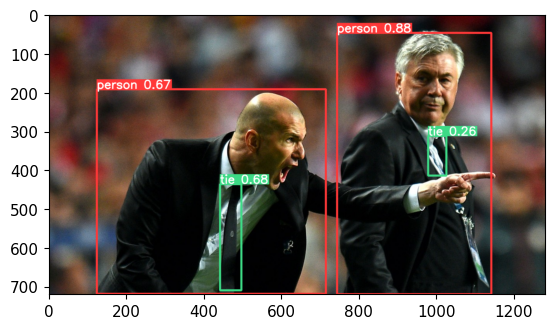

In [5]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

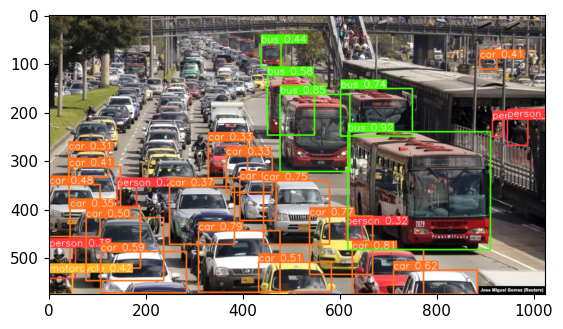

In [6]:
img2 = 'https://gdb.voanews.com/3F12BCA8-1CC1-4726-AF44-3F117A542B9F_cx0_cy9_cw0_w1023_r1_s.jpg'
results2 = model(img2)
plt.imshow(np.squeeze(results2.render()))
plt.show()

In [7]:
results2.print()

image 1/1: 575x1023 5 persons, 17 cars, 1 motorcycle, 5 buss
Speed: 459.1ms pre-process, 200.2ms inference, 1.7ms NMS per image at shape (1, 3, 384, 640)


## REAL TIME DETECTION

In [21]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    results = model(frame)


    # TITLE
    cv2.imshow('YOLO', np.squeeze(results.render()))


    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
for i in range (1,5):
    cv2.waitKey(1)

In [9]:
import uuid
import os
import time

In [10]:
images_path = os.path.join('data', 'images')
labels = ['awake', 'drowsy']
number_imgs = 20

In [11]:
# cap = cv2.VideoCapture(0)
# for label in labels:
#     print('Collecting images for {}'.format(label))
#     time.sleep(5)

#     for img_num in range(number_imgs):
#         print('Collecting images for {}, image number {}'.format(label, img_num))

#         ret, frame = cap.read()

#         imgname = os.path.join(images_path, label+'.'+str(uuid.uuid1())+'.jpg')

#         cv2.imwrite(imgname, frame)

#         cv2.imshow('Image Collection', frame)

#         time.sleep(2)
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break

# cap.release()
# cv2.destroyAllWindows()
# for i in range (1,5):
#     cv2.waitKey(1)

In [12]:
! git clone https://github.com/HumanSignal/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [13]:
! pip3 install pyqt5 lxml --upgrade
! cd labelImg && pyrcc5 -o libs/resources.py resources.qrc


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip3 install --upgrade pip


In [14]:
! cd yolov5 && python3 train.py --img 320 --batch 16 --epochs 5 --data dataset.yaml --weights yolov5s.pt --workers 0

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=0, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
fatal: cannot change to '/Users/masonholcombe/Projects/Computer': No such file or directory
YOLOv5 🚀 2024-1-5 Python-3.11.7 torch-2.1.2 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warm

In [24]:
newmodel = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp16/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/masonholcombe/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-1-6 Python-3.11.7 torch-2.1.2 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [25]:
newmodel.conf = 0.01

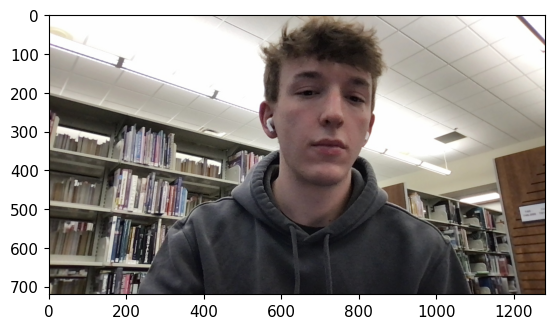

In [17]:
img = os.path.join('data', 'images', 'awake.4b4fa212-ac0f-11ee-9e31-b29c4ac43927.jpg')
results = newmodel(img)

plt.imshow(np.squeeze(results.render()))
plt.show()

In [18]:
results.print()

image 1/1: 720x1280 (no detections)
Speed: 21.7ms pre-process, 201.2ms inference, 0.7ms NMS per image at shape (1, 3, 384, 640)


In [26]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    results = newmodel(frame)


    # TITLE
    cv2.imshow('YOLO', np.squeeze(results.render()))


    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
for i in range (1,5):
    cv2.waitKey(1)